In [1]:
import pandas as pd
import numpy as np
from IPython.display import display as display_dataframe
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
#supervised
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
#unsupervised
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [22]:
data = pd.read_csv("oversampled.csv")
# X, y = data.drop(['Performance', 'Self Awareness', 'Self Regulation', 'Motivation', 'Empathy', 'Social Skills'], axis=1), data['Performance']
X_train, y_train = data.drop(['Performance', 'Performance_bins'], axis=1), data['Performance']
data = pd.read_csv("data/data.csv")
X_test, y_test = data.drop(['Performance'], axis=1), data['Performance']
# del data, X, y
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(891, 35) (480, 35) (891,) (480,)


In [9]:
pd.read_csv("data/data.csv").columns

Index(['Unnamed: 0', 'Family Size', 'Living with parents?', 'Mother Edu',
       'Father Edu', 'Parent Income', 'Commute time', 'Avg study time',
       'Educational support', 'Extra-curricular', 'Higher studies',
       'Internet at home?', 'Tuition count', 'Health', 'Avg leaves',
       'Performance', 'Self Awareness', 'Self Regulation', 'Motivation',
       'Empathy', 'Social Skills', 'Extroverted', 'Intuitive', 'Thinking',
       'Perceiving', 'IX', 'X', 'XI', 'XII', 'Female', 'Male',
       'Other means of travel', 'Travel by Bus', 'Travel by auto-rikshaw',
       'Travel by car', 'Travel by walk'],
      dtype='object')

In [11]:
data = pd.read_csv("data/data.csv")
X, y = data.drop(['Performance', 'Self Awareness', 'Self Regulation', 'Motivation', 'Empathy', 'Social Skills', 'Unnamed: 0'], axis=1), data['Performance']
# X, y = data.drop('Performance', axis=1), data['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
del data, X, y
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(360, 29) (120, 29) (360,) (120,)


In [62]:
data = pd.read_csv("data_scaled_with_DT.csv")
X, y = data.drop(['Performance'], axis=1), data['Performance']
# X, y = data.drop('Performance', axis=1), data['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
del data, X, y
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(360, 31) (120, 31) (360,) (120,)


# Models

count    120.000000
mean      51.273750
std       19.493247
min       12.200000
25%       36.662500
50%       50.050000
75%       66.633333
max       92.000000
Name: Performance, dtype: float64


 Linear Regression
count    120.000000
mean      48.643490
std       10.992932
min       23.437500
25%       39.875000
50%       50.062500
75%       57.281250
max       67.468750
dtype: float64
276.41359935619596
13.458697916667498
12.221874999999999
-1.3065699863707576


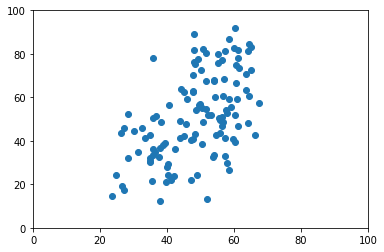



 SVM
count    120.000000
mean      46.881370
std       10.897579
min       16.463673
25%       37.863792
50%       49.531143
75%       55.629063
max       63.711650
dtype: float64
282.77012947609006
13.469206305748411
11.4267021131506
-1.4010864758873578


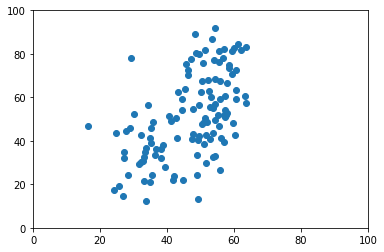



 Decision Tree
count    120.000000
mean      49.649514
std       19.706347
min       14.800000
25%       33.666667
50%       47.466667
75%       65.400000
max       93.500000
dtype: float64
476.3536961803977
17.4300694444425
14.716666666666663
-0.23694838701908472


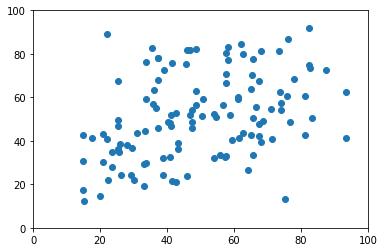



 KNN
count    120.000000
mean      48.646859
std        8.363904
min       28.203846
25%       42.920673
50%       50.446154
75%       54.664744
max       64.961538
dtype: float64
317.31060290651607
14.32413461538423
11.915064102562827
-3.57404849848888


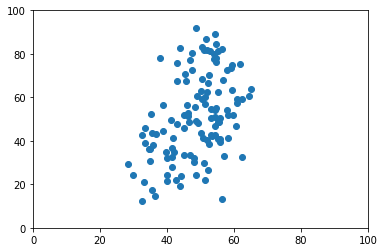



 Random Forest
count    120.000000
mean      48.397957
std       11.291583
min       22.383333
25%       40.296354
50%       49.534722
75%       57.162500
max       68.819444
dtype: float64
282.2108748512945
13.705075231480997
11.507291666666667
-1.2320213075243274


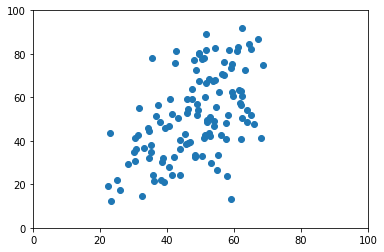

CPU times: user 1.9 s, sys: 1.69 s, total: 3.6 s
Wall time: 2.92 s


In [14]:
%%time

models = {
    'Linear Regression': LinearRegression(),
    'SVM': LinearSVR(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

grid = {
    'Linear Regression': {
        
    },
    'SVM': {
        'C': list(range(1, 11))
    },
    'KNN': {
        'n_neighbors': list(range(3, 15, 2))
    },
    'Decision Tree': {
        
    },
    'Random Forest': {
        'n_estimators': list(range(3, 26, 3))
    },
}

print(y_test.describe())

metrics = [mean_squared_error, mean_absolute_error, median_absolute_error, r2_score]

for model in models:
    models[model] = GridSearchCV(models[model], param_grid=grid[model], n_jobs=-1)
    models[model].fit(X_train, y_train)
    print("\n\n", model)
    res = models[model].predict(X_test)
    print(pd.Series(res).describe())
#     print(mean_squared_error(res, y_test)**0.5)
    for metric in metrics:
        print(metric(res, y_test))  
    plt.scatter(res, y_test)
    plt.axis([0, 100, 0, 100])
    plt.show()

Model Evaluation 

| Model  | MSE  | R2  |
|:-:|:-:|:-:|
| SVM  | 282.77  | -1.4  |
| Decision Tree  | 476.35  | -0.23  |
| Random Forest  | 282.21  | -1.23  |
| Linear Regression  | 276.41  | -1.3  |
| Neural Network  | 283.08  | -0.78  |
| KNN  | 317.31  | -3.57  |

In [4]:
data = pd.read_csv("data/data.csv")
y = data['Performance']
data.drop(['Performance', 'Self Awareness', 'Self Regulation', 'Motivation', 'Empathy', 'Social Skills'], axis=1, inplace=True)

# for 
#     models['Linear Regression'].best_estimator_.coef_

In [5]:
coeff = LinearRegression().fit(X_train, y_train).coef_.astype(np.int64)
list(zip(data.columns, coeff))

[('Unnamed: 0', 0),
 ('Family Size', 1),
 ('Living with parents?', -2),
 ('Mother Edu', 1),
 ('Father Edu', 8),
 ('Parent Income', 0),
 ('Commute time', 1),
 ('Avg study time', 16),
 ('Educational support', -1),
 ('Extra-curricular', 5),
 ('Higher studies', 2),
 ('Internet at home?', 0),
 ('Tuition count', 1),
 ('Health', 6),
 ('Avg leaves', -21),
 ('Extroverted', 0),
 ('Intuitive', 7),
 ('Thinking', 7),
 ('Perceiving', -2),
 ('IX', 3),
 ('X', 3),
 ('XI', -12),
 ('XII', 5),
 ('Female', 0),
 ('Male', 0),
 ('Other means of travel', -1),
 ('Travel by Bus', -1),
 ('Travel by auto-rikshaw', 0),
 ('Travel by car', -3),
 ('Travel by walk', 5)]

In [60]:
coeff = (DecisionTreeRegressor().fit(X_train, y_train).feature_importances_*100).astype(np.int8)
list(zip(data.columns, coeff))

[('Unnamed: 0', 12),
 ('Family Size', 2),
 ('Living with parents?', 1),
 ('Mother Edu', 2),
 ('Father Edu', 2),
 ('Parent Income', 4),
 ('Commute time', 1),
 ('Avg study time', 3),
 ('Educational support', 1),
 ('Extra-curricular', 1),
 ('Higher studies', 2),
 ('Internet at home?', 0),
 ('Tuition count', 3),
 ('Health', 5),
 ('Avg leaves', 3),
 ('Extroverted', 2),
 ('Intuitive', 3),
 ('Thinking', 4),
 ('Perceiving', 10),
 ('IX', 0),
 ('X', 1),
 ('XI', 20),
 ('XII', 0),
 ('Female', 0),
 ('Male', 0),
 ('Other means of travel', 0),
 ('Travel by Bus', 3),
 ('Travel by auto-rikshaw', 1),
 ('Travel by car', 0),
 ('Travel by walk', 0)]

In [61]:
new_data = data * (coeff+0.01)
new_data['Performance'] = y
new_data.to_csv("data_scaled_with_DT.csv")